In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# Set a clean style for the plots
sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-deep")

# =========================================
# === Database Connection and Data Loading
# =========================================

# Database credentials
user = "root"
password = "Root7878"
host = "localhost"
port = 3306
database = "DataWarehouse"

# Encode password safely
password = quote_plus(password)

# Create SQLAlchemy engine
try:
    engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")
    print("Database connection successful.")
except Exception as e:
    print(f"Error connecting to the database: {e}")
    engine = None

Database connection successful.


In [ ]:
# ================================
# === Data Visualizations
# ================================

In [2]:
if engine:
    # --- 1. Measures Exploration (Big Numbers) ---
    print("\n--- Measures Exploration ---")
    measures_query = """
    SELECT 'Total Sales' AS measure_name, SUM(sales_amount) AS measure_value FROM fact_sales
    UNION ALL
    SELECT 'Total Quantity Sold', SUM(quantity) FROM fact_sales
    UNION ALL
    SELECT 'Average Price', AVG(price) FROM fact_sales
    UNION ALL
    SELECT 'Total Orders', COUNT(DISTINCT order_number) FROM fact_sales
    UNION ALL
    SELECT 'Total Products', COUNT(DISTINCT product_name) FROM dim_products
    UNION ALL
    SELECT 'Total Customers', COUNT(customer_key) FROM dim_customers
    UNION ALL
    SELECT 'Total Ordering Customers', COUNT(DISTINCT customer_key) FROM fact_sales;
    """
    df_measures = pd.read_sql(measures_query, engine)
    
    # Format and print the table
    print("Key Business Metrics:")
    print(df_measures.to_string(index=False))

else:
    print("No visualizations can be generated due to a database connection error.")


--- Measures Exploration ---
Key Business Metrics:
            measure_name  measure_value
             Total Sales   2.935625e+07
     Total Quantity Sold   6.042300e+04
           Average Price   4.860378e+02
            Total Orders   2.765900e+04
          Total Products   2.950000e+02
         Total Customers   1.848400e+04
Total Ordering Customers   1.848400e+04



--- Magnitude Analysis ---


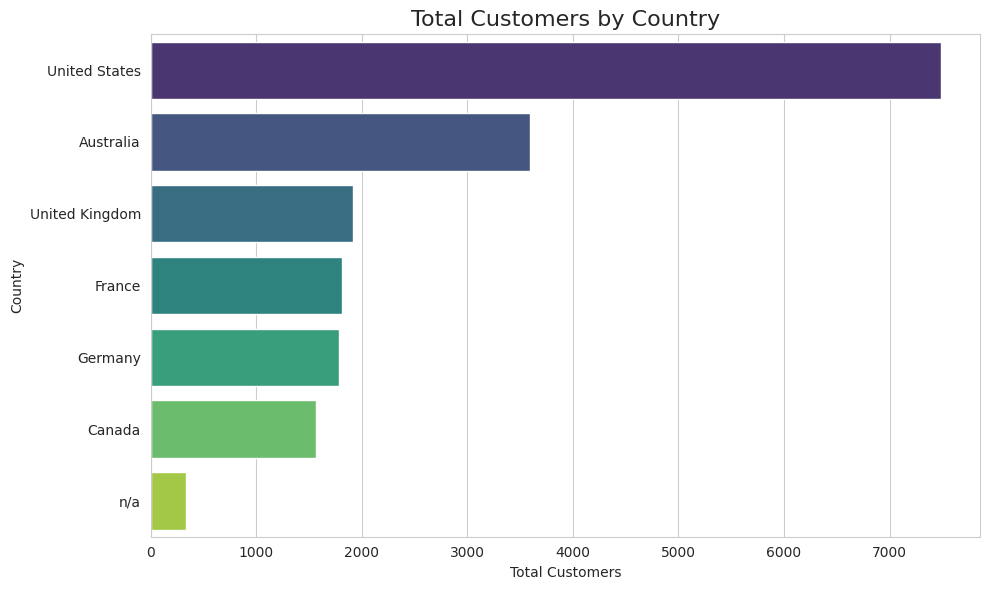

In [10]:
if engine:
    # --- 2. Magnitude Analysis ---
    print("\n--- Magnitude Analysis ---")

    # Customers by Country
    customers_by_country_query = """
    SELECT country, COUNT(customer_key) AS total_customers
    FROM dim_customers
    GROUP BY country
    ORDER BY total_customers DESC;
    """
    df_customers_by_country = pd.read_sql(customers_by_country_query, engine)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='total_customers', y='country', data=df_customers_by_country, palette='viridis', hue='country', legend=False)
    plt.title('Total Customers by Country', fontsize=16)
    plt.xlabel('Total Customers')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()

else:
    print("No visualizations can be generated due to a database connection error.")


--- Magnitude Analysis ---


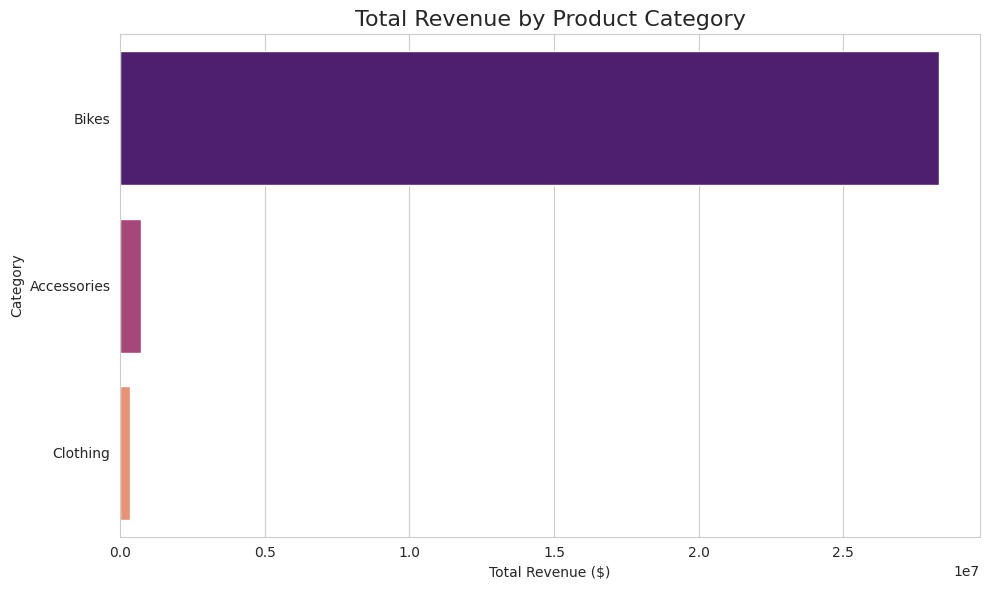

In [8]:
if engine:
    # --- 2. Magnitude Analysis ---
    print("\n--- Magnitude Analysis ---")

    # Total Revenue by Product Category
    revenue_by_category_query = """
    SELECT p.category, SUM(f.sales_amount) AS total_revenue
    FROM fact_sales f
    LEFT JOIN dim_products p ON p.product_key = f.product_key
    GROUP BY p.category
    ORDER BY total_revenue DESC;
    """
    df_revenue_by_category = pd.read_sql(revenue_by_category_query, engine)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='total_revenue', y='category', data=df_revenue_by_category, palette='magma', hue='category', legend=False)
    plt.title('Total Revenue by Product Category', fontsize=16)
    plt.xlabel('Total Revenue ($)')
    plt.ylabel('Category')
    plt.tight_layout()
    plt.show()

else:
    print("No visualizations can be generated due to a database connection error.")


--- Ranking Analysis ---


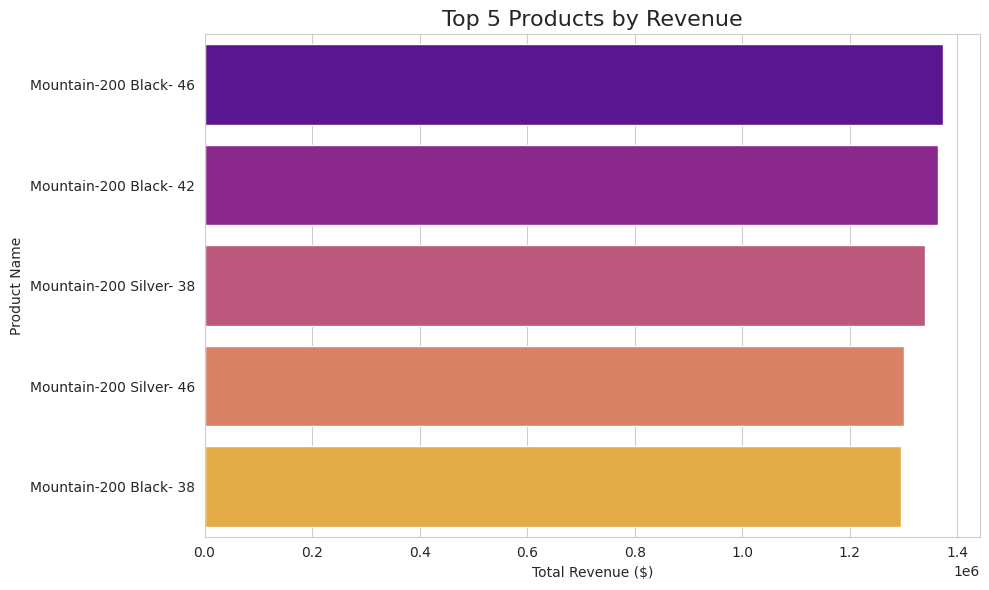

In [5]:
if engine:
    # --- 3. Ranking Analysis ---
    print("\n--- Ranking Analysis ---")
    
    # Top 5 Products by Revenue
    top_products_query = """
    SELECT p.product_name, SUM(f.sales_amount) AS total_revenue
    FROM fact_sales f
    LEFT JOIN dim_products p ON p.product_key = f.product_key
    GROUP BY p.product_name
    ORDER BY total_revenue DESC
    LIMIT 5;
    """
    df_top_products = pd.read_sql(top_products_query, engine)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='total_revenue', y='product_name', data=df_top_products, palette='plasma', hue='product_name', legend=False)
    plt.title('Top 5 Products by Revenue', fontsize=16)
    plt.xlabel('Total Revenue ($)')
    plt.ylabel('Product Name')
    plt.tight_layout()
    plt.show()

else:
    print("No visualizations can be generated due to a database connection error.")


--- Ranking Analysis ---


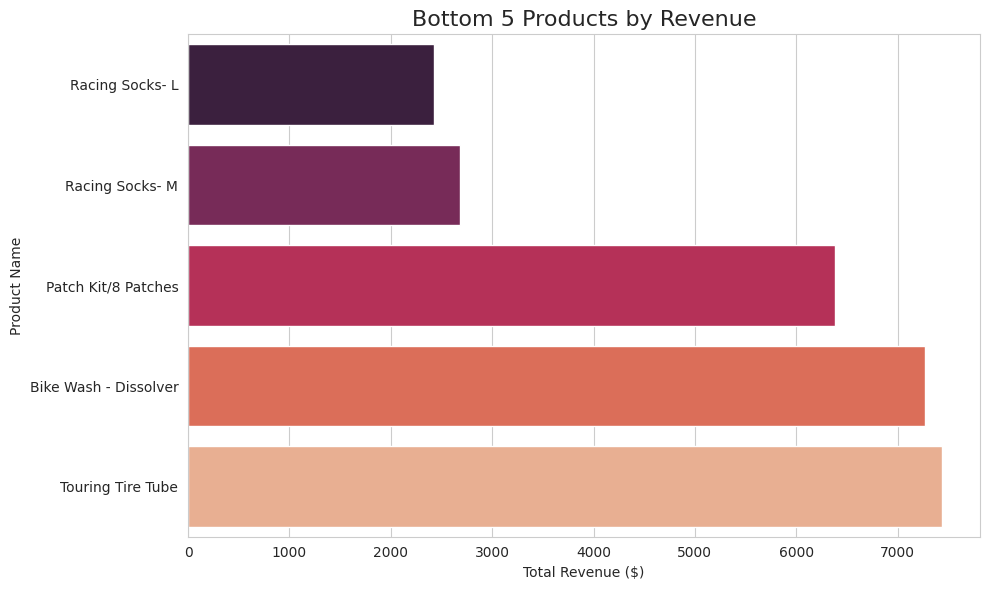

In [6]:
if engine:
    # --- 3. Ranking Analysis ---
    print("\n--- Ranking Analysis ---")

    # Bottom 5 Products by Revenue
    bottom_products_query = """
    SELECT p.product_name, SUM(f.sales_amount) AS total_revenue
    FROM fact_sales f
    LEFT JOIN dim_products p ON p.product_key = f.product_key
    GROUP BY p.product_name
    ORDER BY total_revenue ASC
    LIMIT 5;
    """
    df_bottom_products = pd.read_sql(bottom_products_query, engine)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='total_revenue', y='product_name', data=df_bottom_products, palette='rocket', hue='product_name', legend=False)
    plt.title('Bottom 5 Products by Revenue', fontsize=16)
    plt.xlabel('Total Revenue ($)')
    plt.ylabel('Product Name')
    plt.tight_layout()
    plt.show()

else:
    print("No visualizations can be generated due to a database connection error.")


--- Ranking Analysis ---


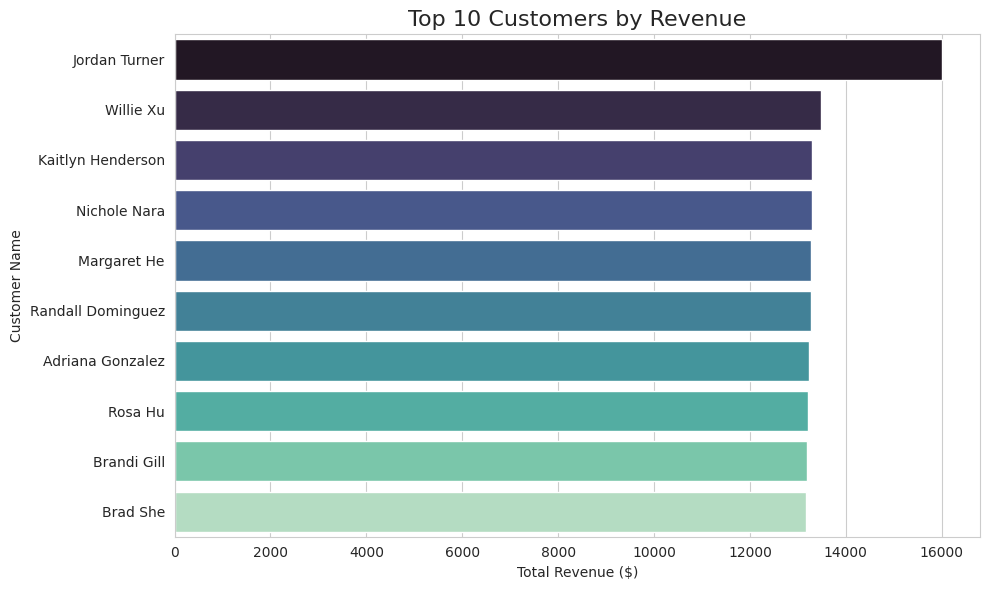

In [7]:
if engine:
    # --- 3. Ranking Analysis ---
    print("\n--- Ranking Analysis ---")

    # Top 10 Customers by Revenue
    top_customers_query = """
    SELECT CONCAT(c.first_name, ' ', c.last_name) AS customer_name, SUM(f.sales_amount) AS total_revenue
    FROM fact_sales f
    LEFT JOIN dim_customers c ON c.customer_key = f.customer_key
    GROUP BY customer_name
    ORDER BY total_revenue DESC
    LIMIT 10;
    """
    df_top_customers = pd.read_sql(top_customers_query, engine)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='total_revenue', y='customer_name', data=df_top_customers, palette='mako', hue='customer_name', legend=False)
    plt.title('Top 10 Customers by Revenue', fontsize=16)
    plt.xlabel('Total Revenue ($)')
    plt.ylabel('Customer Name')
    plt.tight_layout()
    plt.show()

else:
    print("No visualizations can be generated due to a database connection error.")